In [60]:
## IMporting Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
## data gathering
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
## Data Pre-Processing
data.drop(['Id'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
## Labeling
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encodedY = encoder.fit(data[['Species']])
labeledY = encoder.transform(data[['Species']])
labeledY

C:\Python3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
## Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data[['SepalLengthCm', 'SepalWidthCm']])
scaledX

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

In [65]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [66]:
## Divide Train Test Data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    scaledX, labeledY, 
    test_size=0.2, random_state=49
)
xtrain.shape, ytrain.shape

((120, 2), (120,))

In [67]:
#Modelling
from sklearn import tree

# Init
dtree = tree.DecisionTreeClassifier()

## Train
dtree.fit(xtrain, ytrain)

## Test Prediction
ypred = dtree.predict(xtest)
ypred == ytest
y = dtree.predict_proba(xtest)[0]
np.argmax(y)

1

In [68]:
## Evaluation
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))
print('F1 Score: ', f1_score(ytest, ypred, average='weighted'))

Confusion Matrix: 
 [[8 0 0]
 [0 6 4]
 [0 4 8]]
F1 Score:  0.7333333333333333


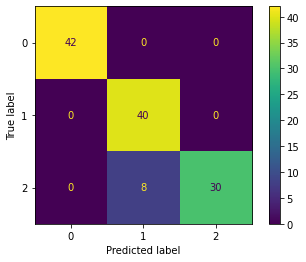

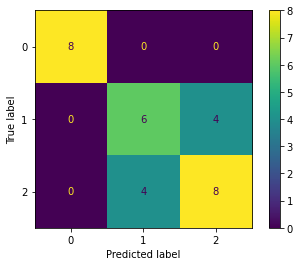

In [69]:
## Evaluation Plot
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree, xtrain, ytrain)
plot_confusion_matrix(dtree, xtest, ytest)

In [70]:
data.head(), data[['Species']].value_counts()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0            5.1           3.5            1.4           0.2  Iris-setosa
 1            4.9           3.0            1.4           0.2  Iris-setosa
 2            4.7           3.2            1.3           0.2  Iris-setosa
 3            4.6           3.1            1.5           0.2  Iris-setosa
 4            5.0           3.6            1.4           0.2  Iris-setosa,
 Species        
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 dtype: int64)

In [71]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

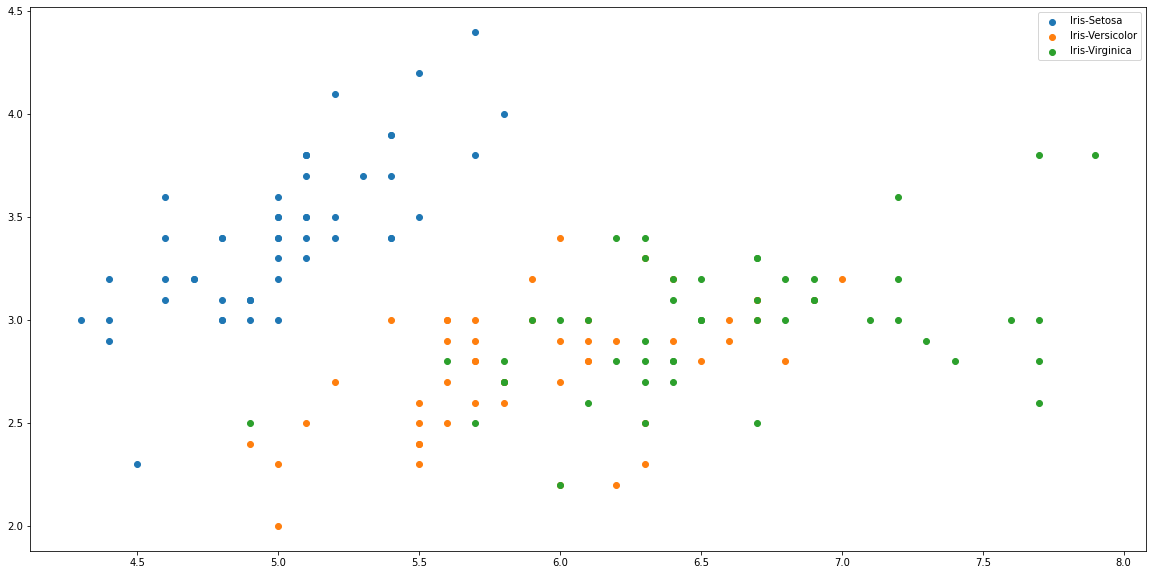

In [72]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.scatter(setosa[['SepalLengthCm']], setosa[['SepalWidthCm']], label = 'Iris-Setosa')
axes.scatter(versicolor[['SepalLengthCm']], versicolor[['SepalWidthCm']], label = 'Iris-Versicolor')
axes.scatter(virginica[['SepalLengthCm']], virginica[['SepalWidthCm']], label = 'Iris-Virginica')
plt.legend()
plt.show()

In [73]:
## Task 
tree.DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [74]:
## Finding Best K through Hyperparameter tuning
from sklearn import model_selection
gridtree = tree.DecisionTreeClassifier(random_state=49)

##
grid = model_selection.GridSearchCV(
    gridtree,
    param_grid={
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': list(range(3,50, 2)),
        'max_features': ['auto','sqrt','log2'],
        'min_samples_split': list(range(3,20, 2)),
    },cv=5, n_jobs=-1, scoring='accuracy'
)
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=49), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                       25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                       45, 47, 49],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
grid.best_params_, grid.best_estimator_

({'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 'auto',
  'min_samples_split': 15,
  'splitter': 'best'},
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                        min_samples_split=15, random_state=49))

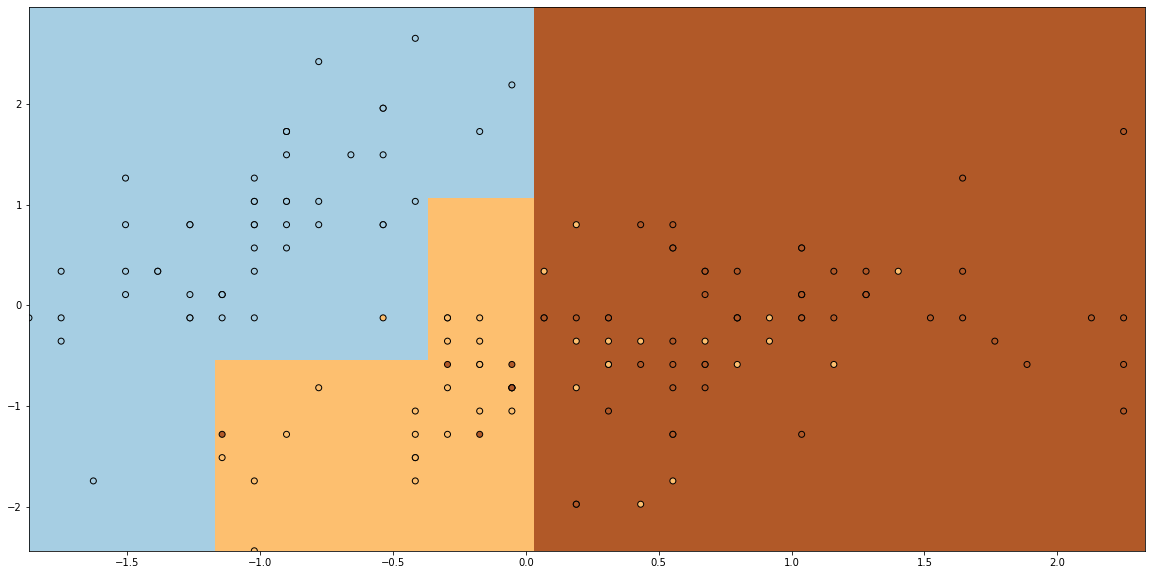

In [76]:
## Visualize Model
finaltree = grid.best_estimator_
finaltree.fit(xtrain, ytrain)

##
xmin, xmax = xtrain[:, 0].min(), xtrain[:, 0].max()
ymin, ymax = xtrain[:, 1].min(), xtrain[:, 1].max()
xmin, xmax, ymin, ymax

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)
# np.c_[xx.ravel(), yy.ravel()]
yhat = finaltree.predict(np.c_[xx.ravel(), yy.ravel()])
yhat.shape, xx.shape
##
yhat = yhat.reshape(xx.shape)
yhat.shape

## Plotting
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, yhat, shading='auto')

plt.scatter(scaledX[:,0], scaledX[:, 1], c = labeledY, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [77]:
from sklearn import ensemble
ensemble.RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}